In [17]:
# load data from data/3d/leave_particles.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import sys 
sys.path.append('../..')
from configs.config import * 

plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

data = pd.read_csv(os.path.join(processed_data_folder, leaving_particles_file_name))

In [18]:
data.head()

id    weights         x         y             z          vx  \
0  2474413902  29929.977  0.000005  0.000005 -1.150133e-08  61085870.0   
1  2500867696  29929.977  0.000005  0.000005 -1.002863e-08  61692184.0   
2  2501259732  29929.977  0.000005  0.000005  9.792090e-08  60556164.0   
3  2474409441  29929.977  0.000005  0.000005  6.371678e-08  60783868.0   
4  2445812809  29929.977  0.000005  0.000005 -4.513335e-07  54953936.0   

          vy          vz     energy  leaving_frame  
0  5060357.0  -432490.47  20.249734            160  
1  4211122.0  -629254.90  20.621579            160  
2  4201916.5  1619896.80  19.860692            160  
3  3939553.0  1390369.10  19.998585            160  
4  5202445.0 -4721053.50  16.443731            170

## Energy Spectrum

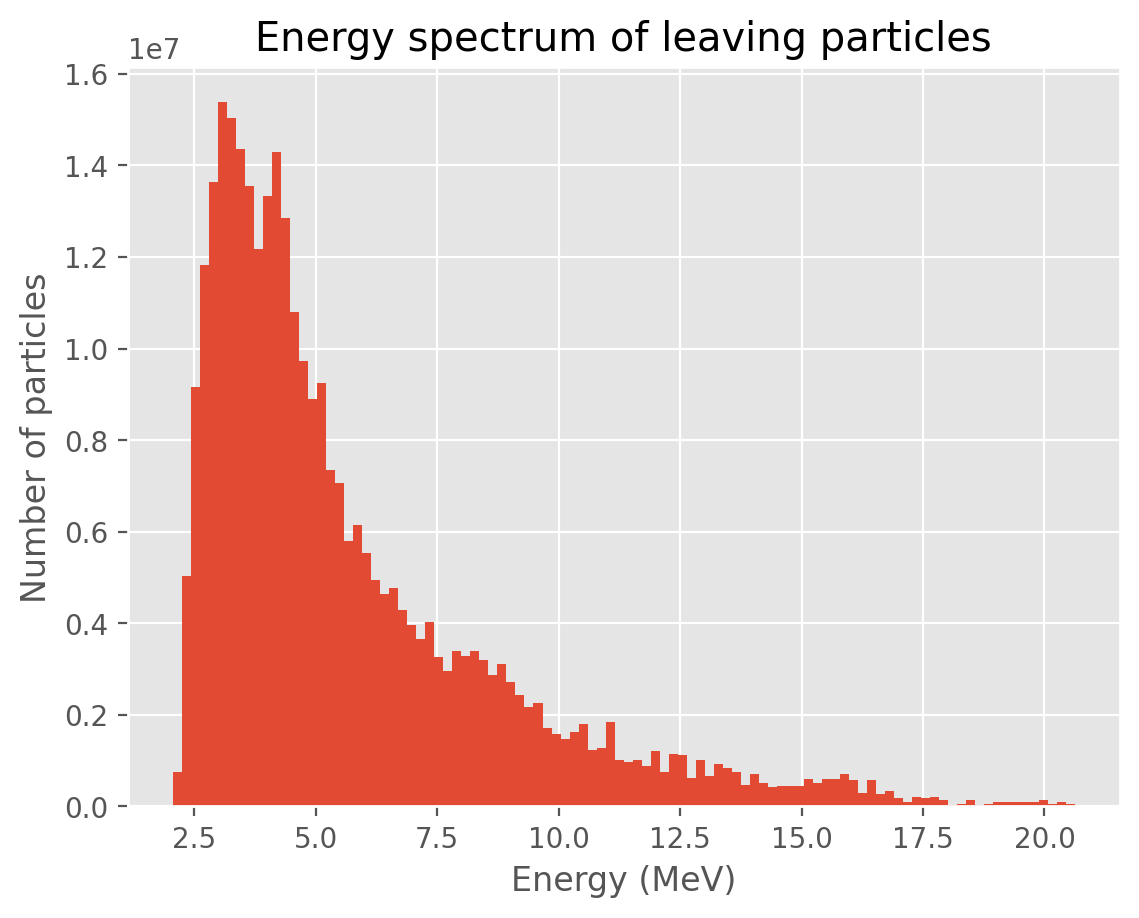

In [19]:
# plot the histogram of energy
plt.hist(data['energy'], weights=data['weights'], bins=100)
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of particles')
plt.title('Energy spectrum of leaving particles')
plt.show()

## Angular Distribution of Leaving Particles

/tmp/ipykernel_205007/3853946509.py:16: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.

/tmp/ipykernel_205007/3853946509.py:17: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



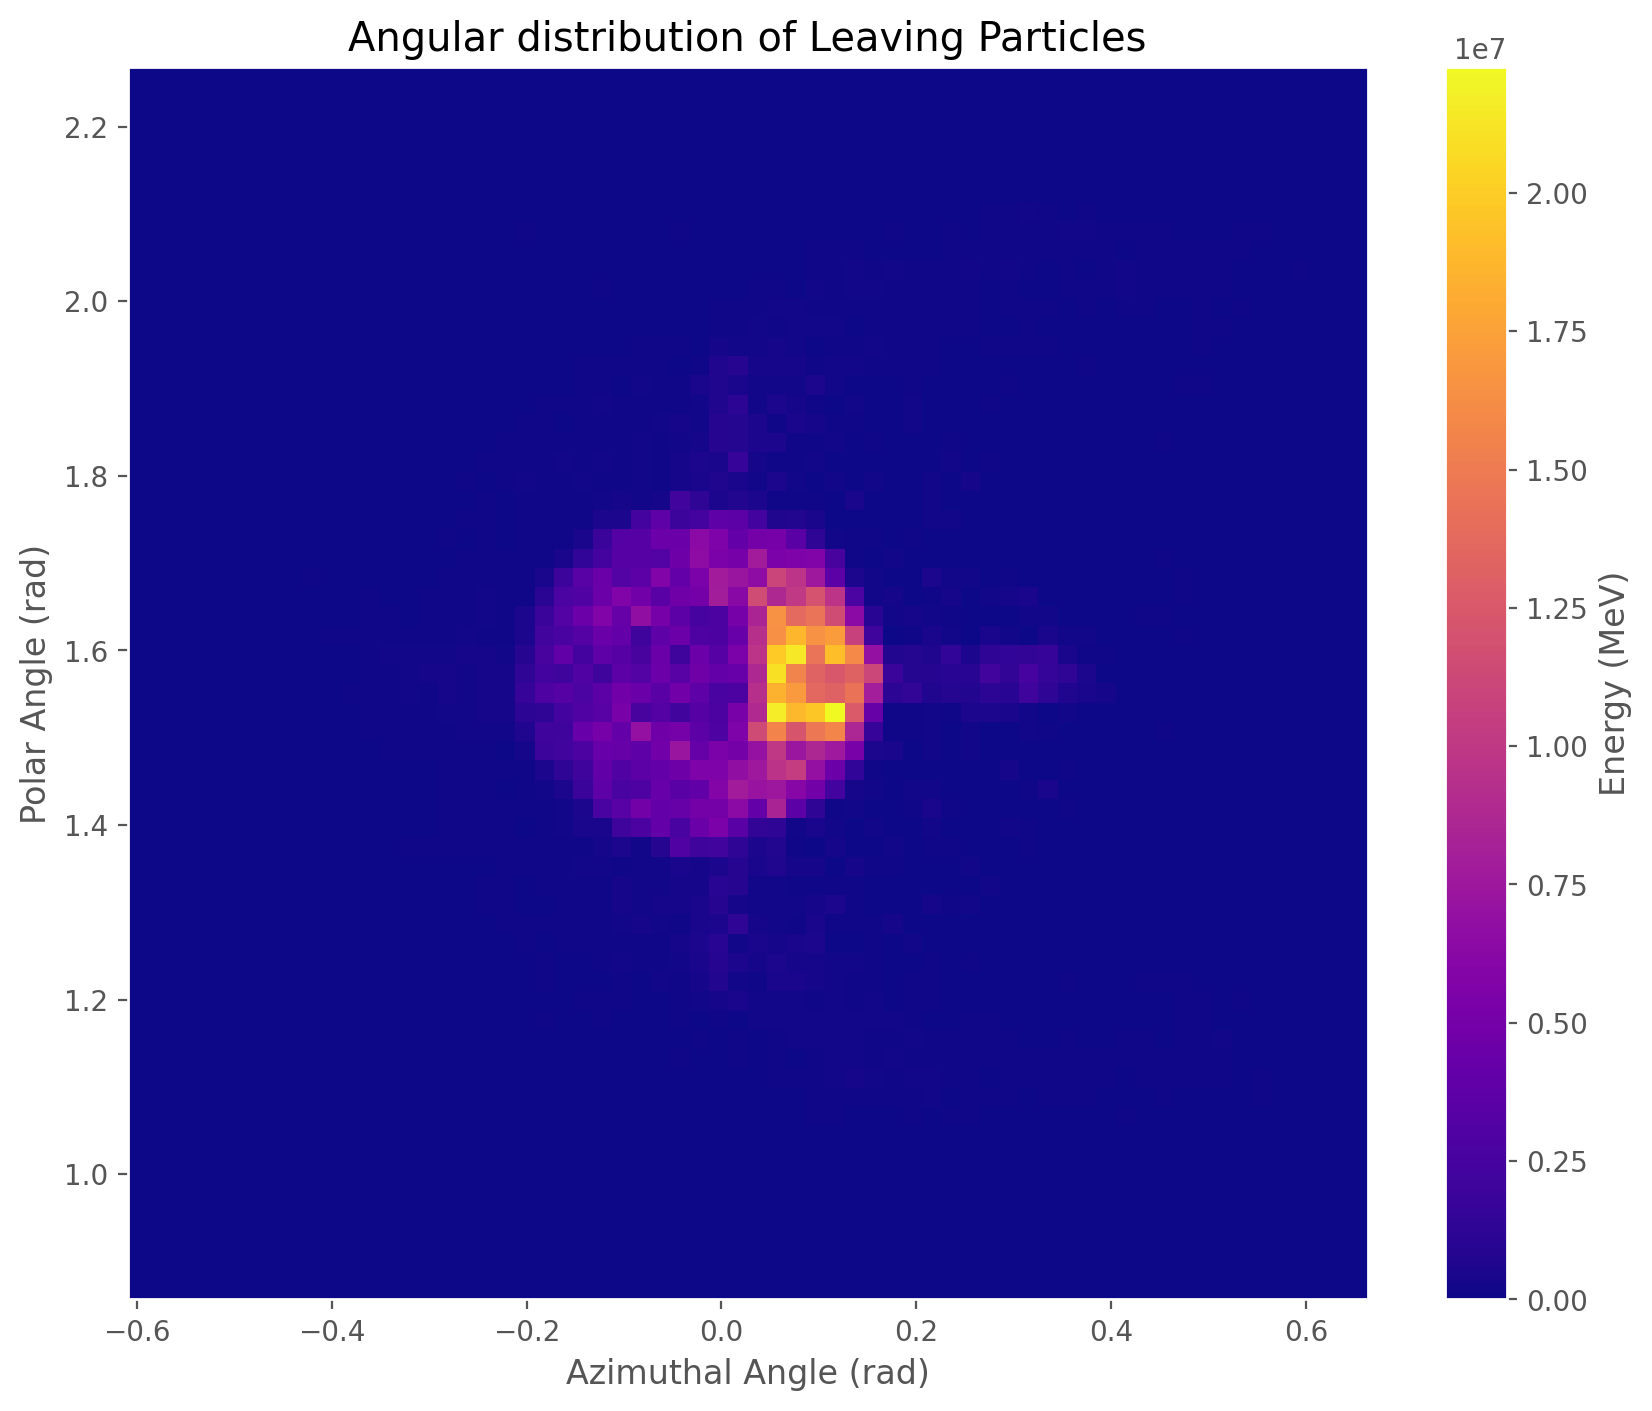

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

rad_to_deg = 180 / np.pi
# Calculate angles
data['phi'] = np.arctan2(data['vy'], data['vx'])
data['theta'] = np.arccos(data['vz'] / np.sqrt(data['vx']**2 + data['vy']**2 + data['vz']**2))

# Calculate 2D histogram
phi_bins, theta_bins = 64, 64
hist, phi_edges, theta_edges = np.histogram2d(data['phi'], data['theta'], bins=[phi_bins, theta_bins], weights=data['energy'] * data['weights'])

# Plot heatmap
plt.figure(figsize=[10,8])
plt.pcolormesh(phi_edges, theta_edges, hist.T, cmap='plasma')
plt.colorbar(label='Energy (MeV)')
plt.xlabel('Azimuthal Angle (rad)')
plt.ylabel('Polar Angle (rad)')
plt.title('Angular distribution of Leaving Particles')
plt.show()

/tmp/ipykernel_205007/1442643346.py:29: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



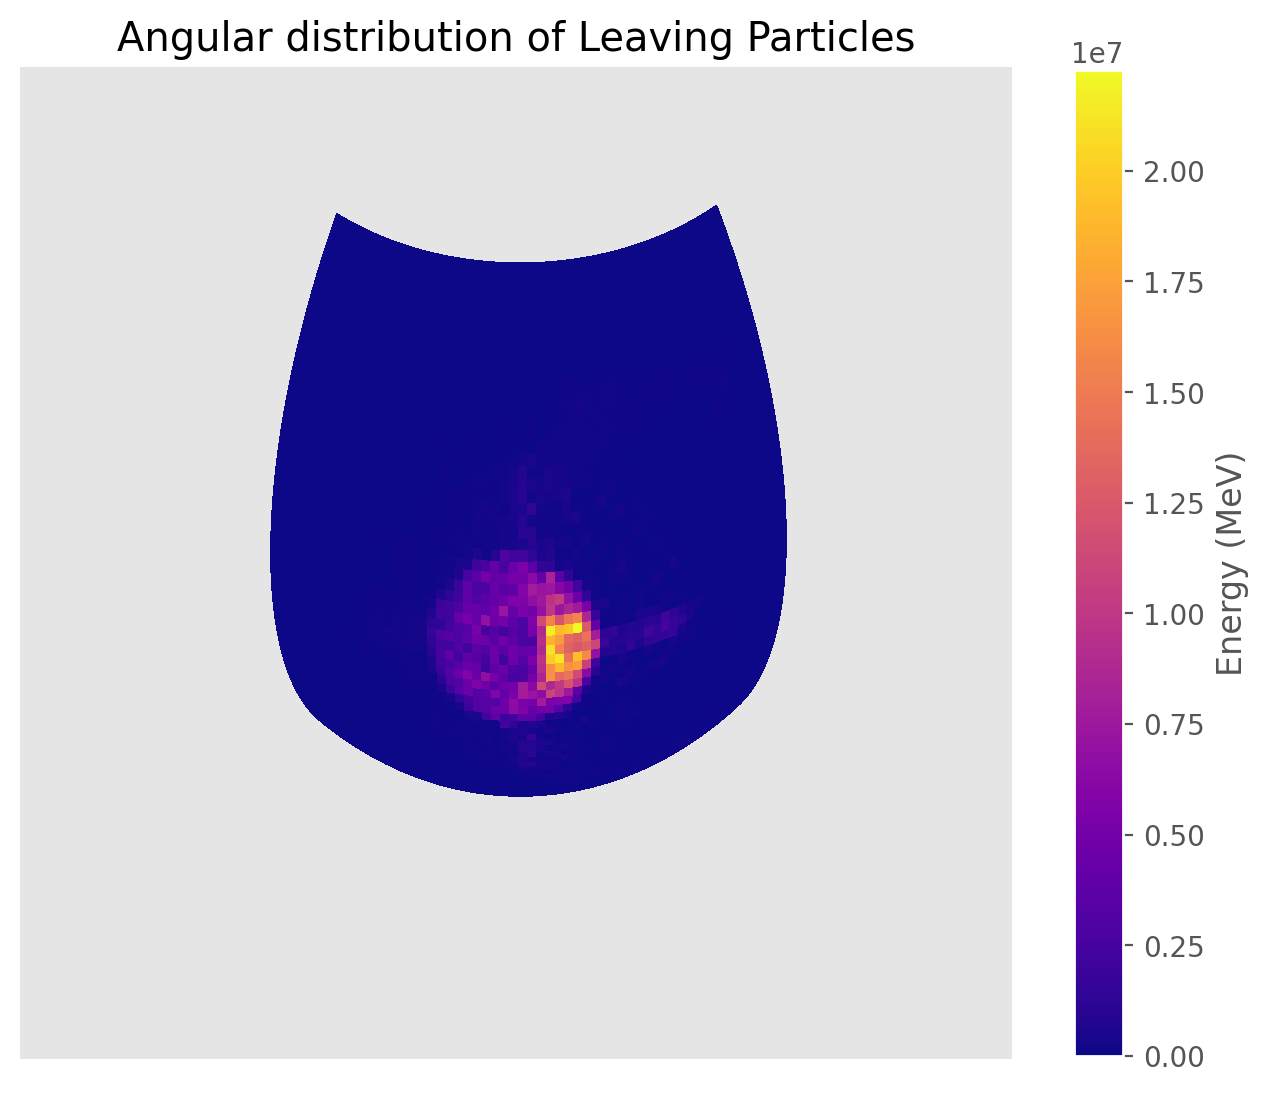

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d

# Define the range of phi and theta based on the edges
phi_range = (phi_edges[0], phi_edges[-1])
theta_range = (theta_edges[0], theta_edges[-1])

# Define spherical coordinates
phi, theta = np.mgrid[phi_range[0]:phi_range[1]:phi_bins*1j, theta_range[0]:theta_range[1]:theta_bins*1j]

# Convert angles to Cartesian coordinates
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

# Create a sphere
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1,1,1]) # Make the sphere aspect ratio 1:1:1
ax._axis3don = False # Turn off the 3d axes

# Plot spherical histogram
ax.plot_surface(
    x, y, z, rstride=1, cstride=1, facecolors=plt.cm.plasma(hist/hist.max()), linewidth=0, antialiased=False, shade=False)

# show legend
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin=0, vmax=hist.max()))
plt.colorbar(sm, shrink=0.8, label='Energy (MeV)')

plt.title('Angular distribution of Leaving Particles')
ax.view_init(elev=20., azim=0)
plt.show()


In [42]:
import numpy as np
import plotly.graph_objects as go

# Create a sphere
sphere = go.Surface(x=x, y=y, z=z, surfacecolor=hist, colorscale='Plasma', colorbar=dict(title='Energy (MeV)'))

# Modify the layout to add axes and title
layout = go.Layout(
    title=dict(text='Angular Energy Spectrum', x=0.5, y=0.9),
    scene=dict(
        xaxis=dict(visible=True, title='x'),
        yaxis=dict(visible=True, title='y'),
        zaxis=dict(visible=True, title='z'),
    ),
)

fig = go.Figure(data=[sphere], layout=layout)
fig.show()


## Histogram of Leaving Frames

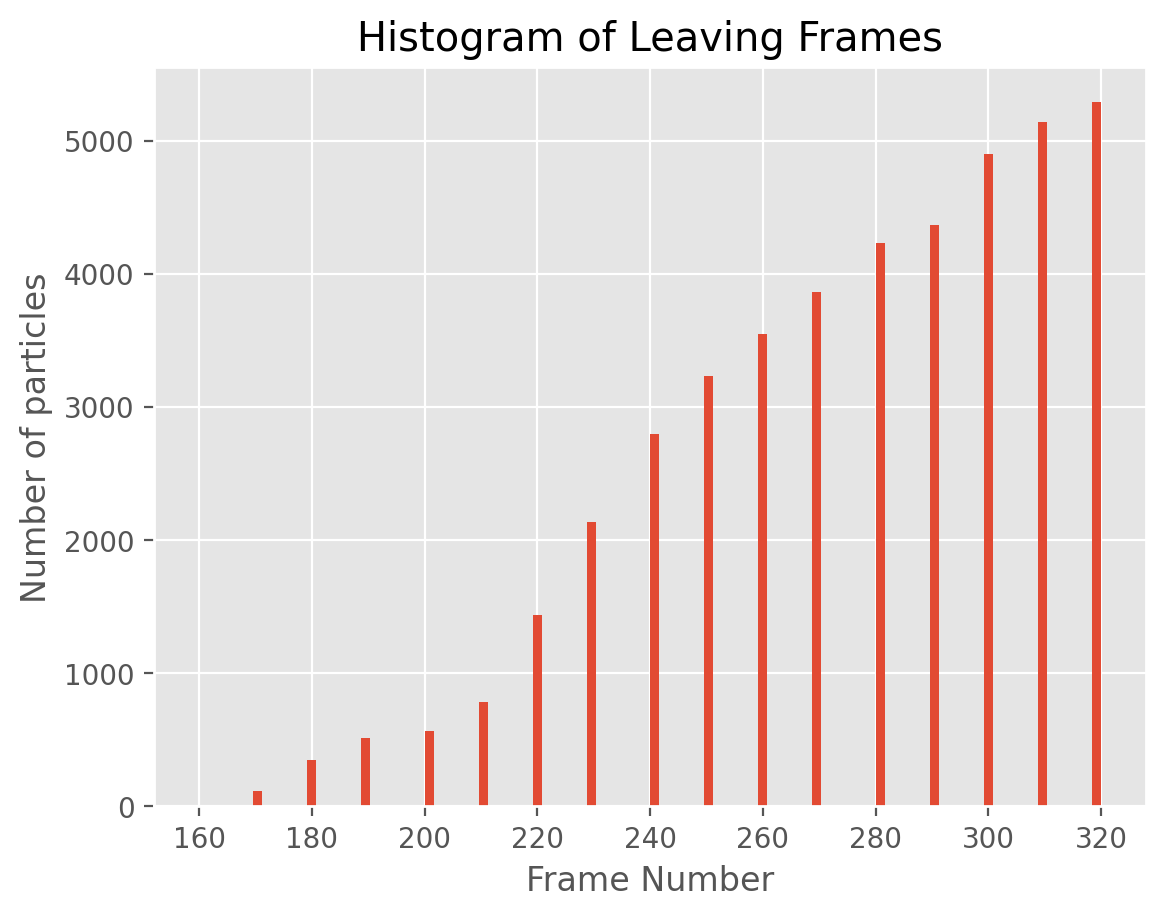

In [43]:
# Extract frame numbers from data
frame_numbers = data['leaving_frame'].values

# Plot histogram of frame numbers
plt.hist(frame_numbers, bins=100)
plt.xlabel('Frame Number')
plt.ylabel('Number of particles')
plt.title('Histogram of Leaving Frames')
plt.show()

## Correlation Matrix of Variables

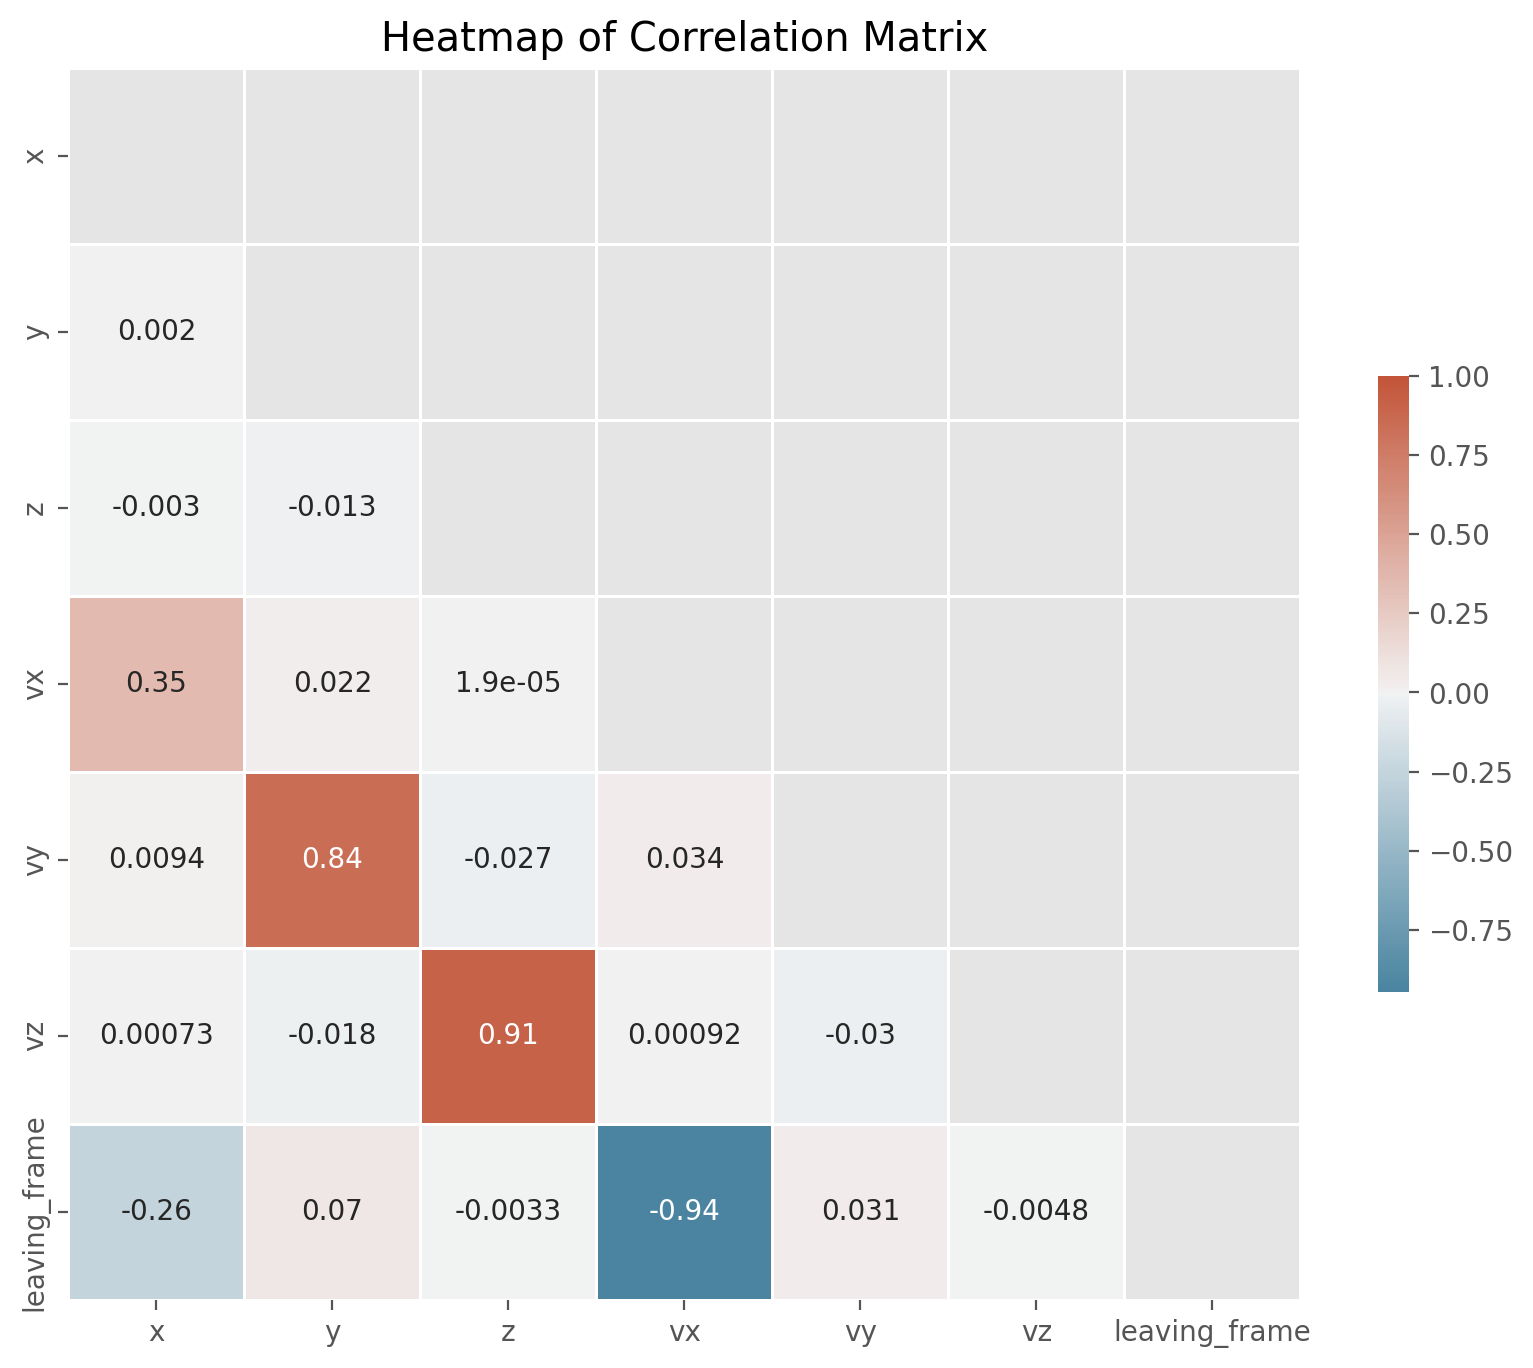

In [32]:
# import the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# assuming 'data' is your DataFrame
cols_of_interest = ['x', 'y', 'z', 'vx', 'vy', 'vz', 'leaving_frame']
data_subset = data[cols_of_interest]

# calculate the correlation matrix
corr = data_subset.corr()

# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# create a color map
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# create the heatmap
plt.figure(figsize=(10, 8))  # adjust size as needed
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Heatmap of Correlation Matrix')
plt.show()

## Position of Leaving Particles

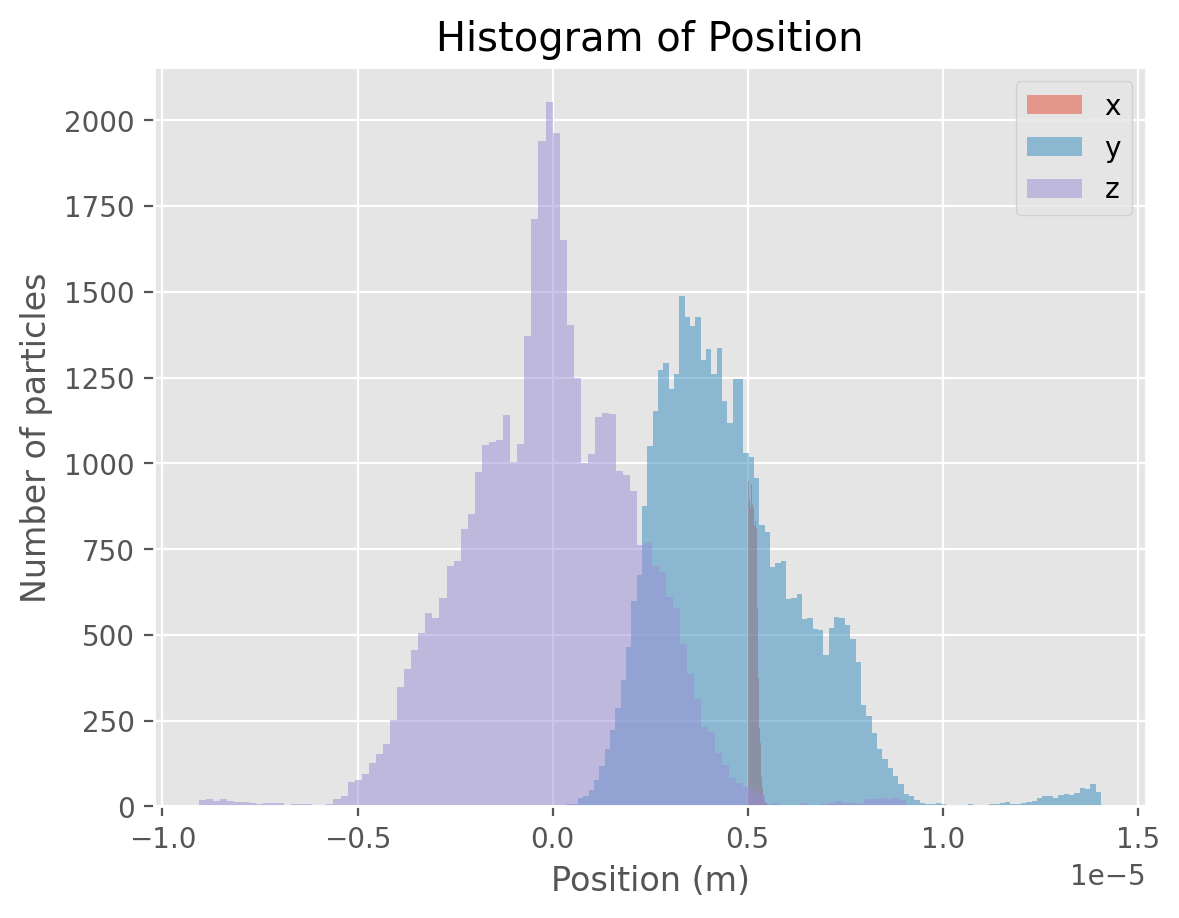

In [33]:
# plot histogram of x y z unstacked 
plt.hist(data['x'], bins=100, alpha=0.5, label='x')
plt.hist(data['y'], bins=100, alpha=0.5, label='y')
plt.hist(data['z'], bins=100, alpha=0.5, label='z')
plt.xlabel('Position (m)')
plt.ylabel('Number of particles')
plt.title('Histogram of Position')
plt.legend()

## Velocity of Leaving Particles

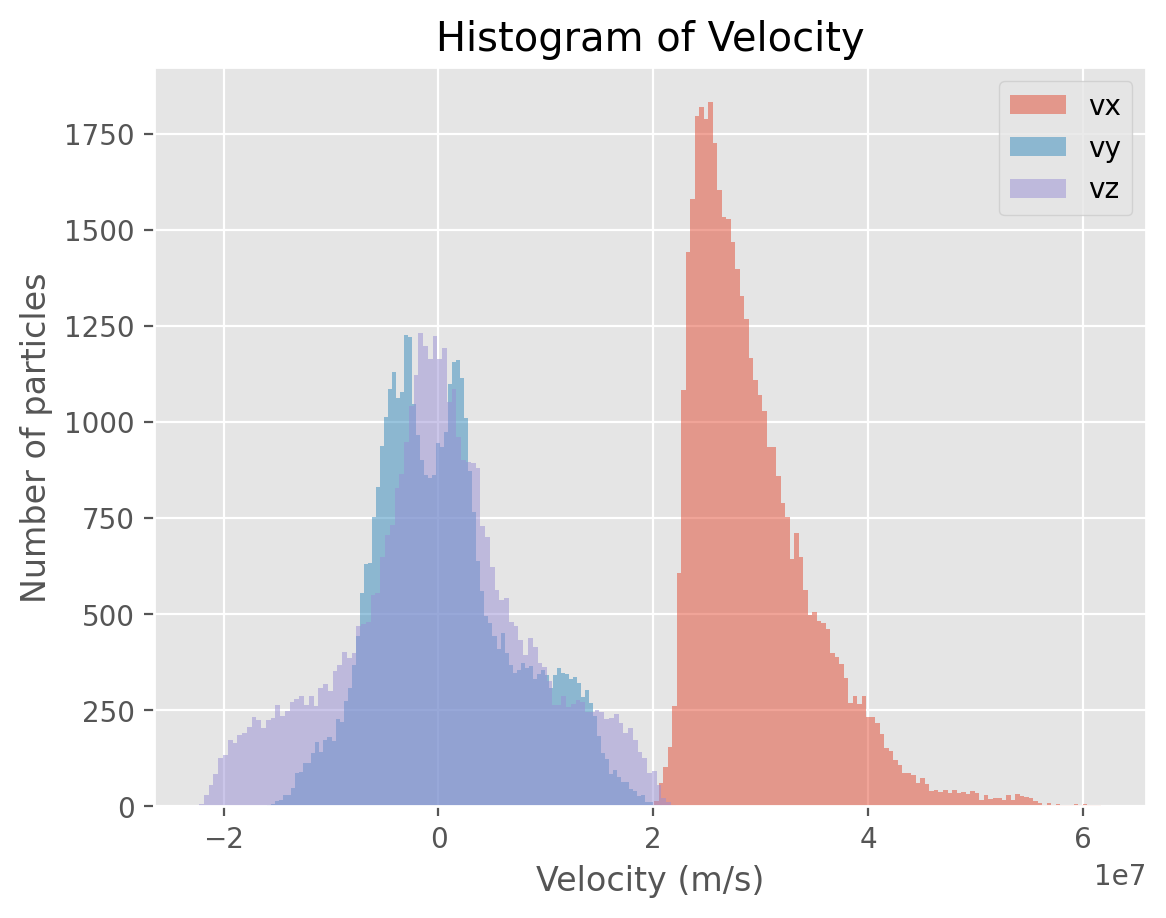

In [44]:
# plot histogram of x y z unstacked 
plt.hist(data['vx'], bins=100, alpha=0.5, label='vx')
plt.hist(data['vy'], bins=100, alpha=0.5, label='vy')
plt.hist(data['vz'], bins=100, alpha=0.5, label='vz')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Number of particles')
plt.title('Histogram of Velocity')
plt.legend()

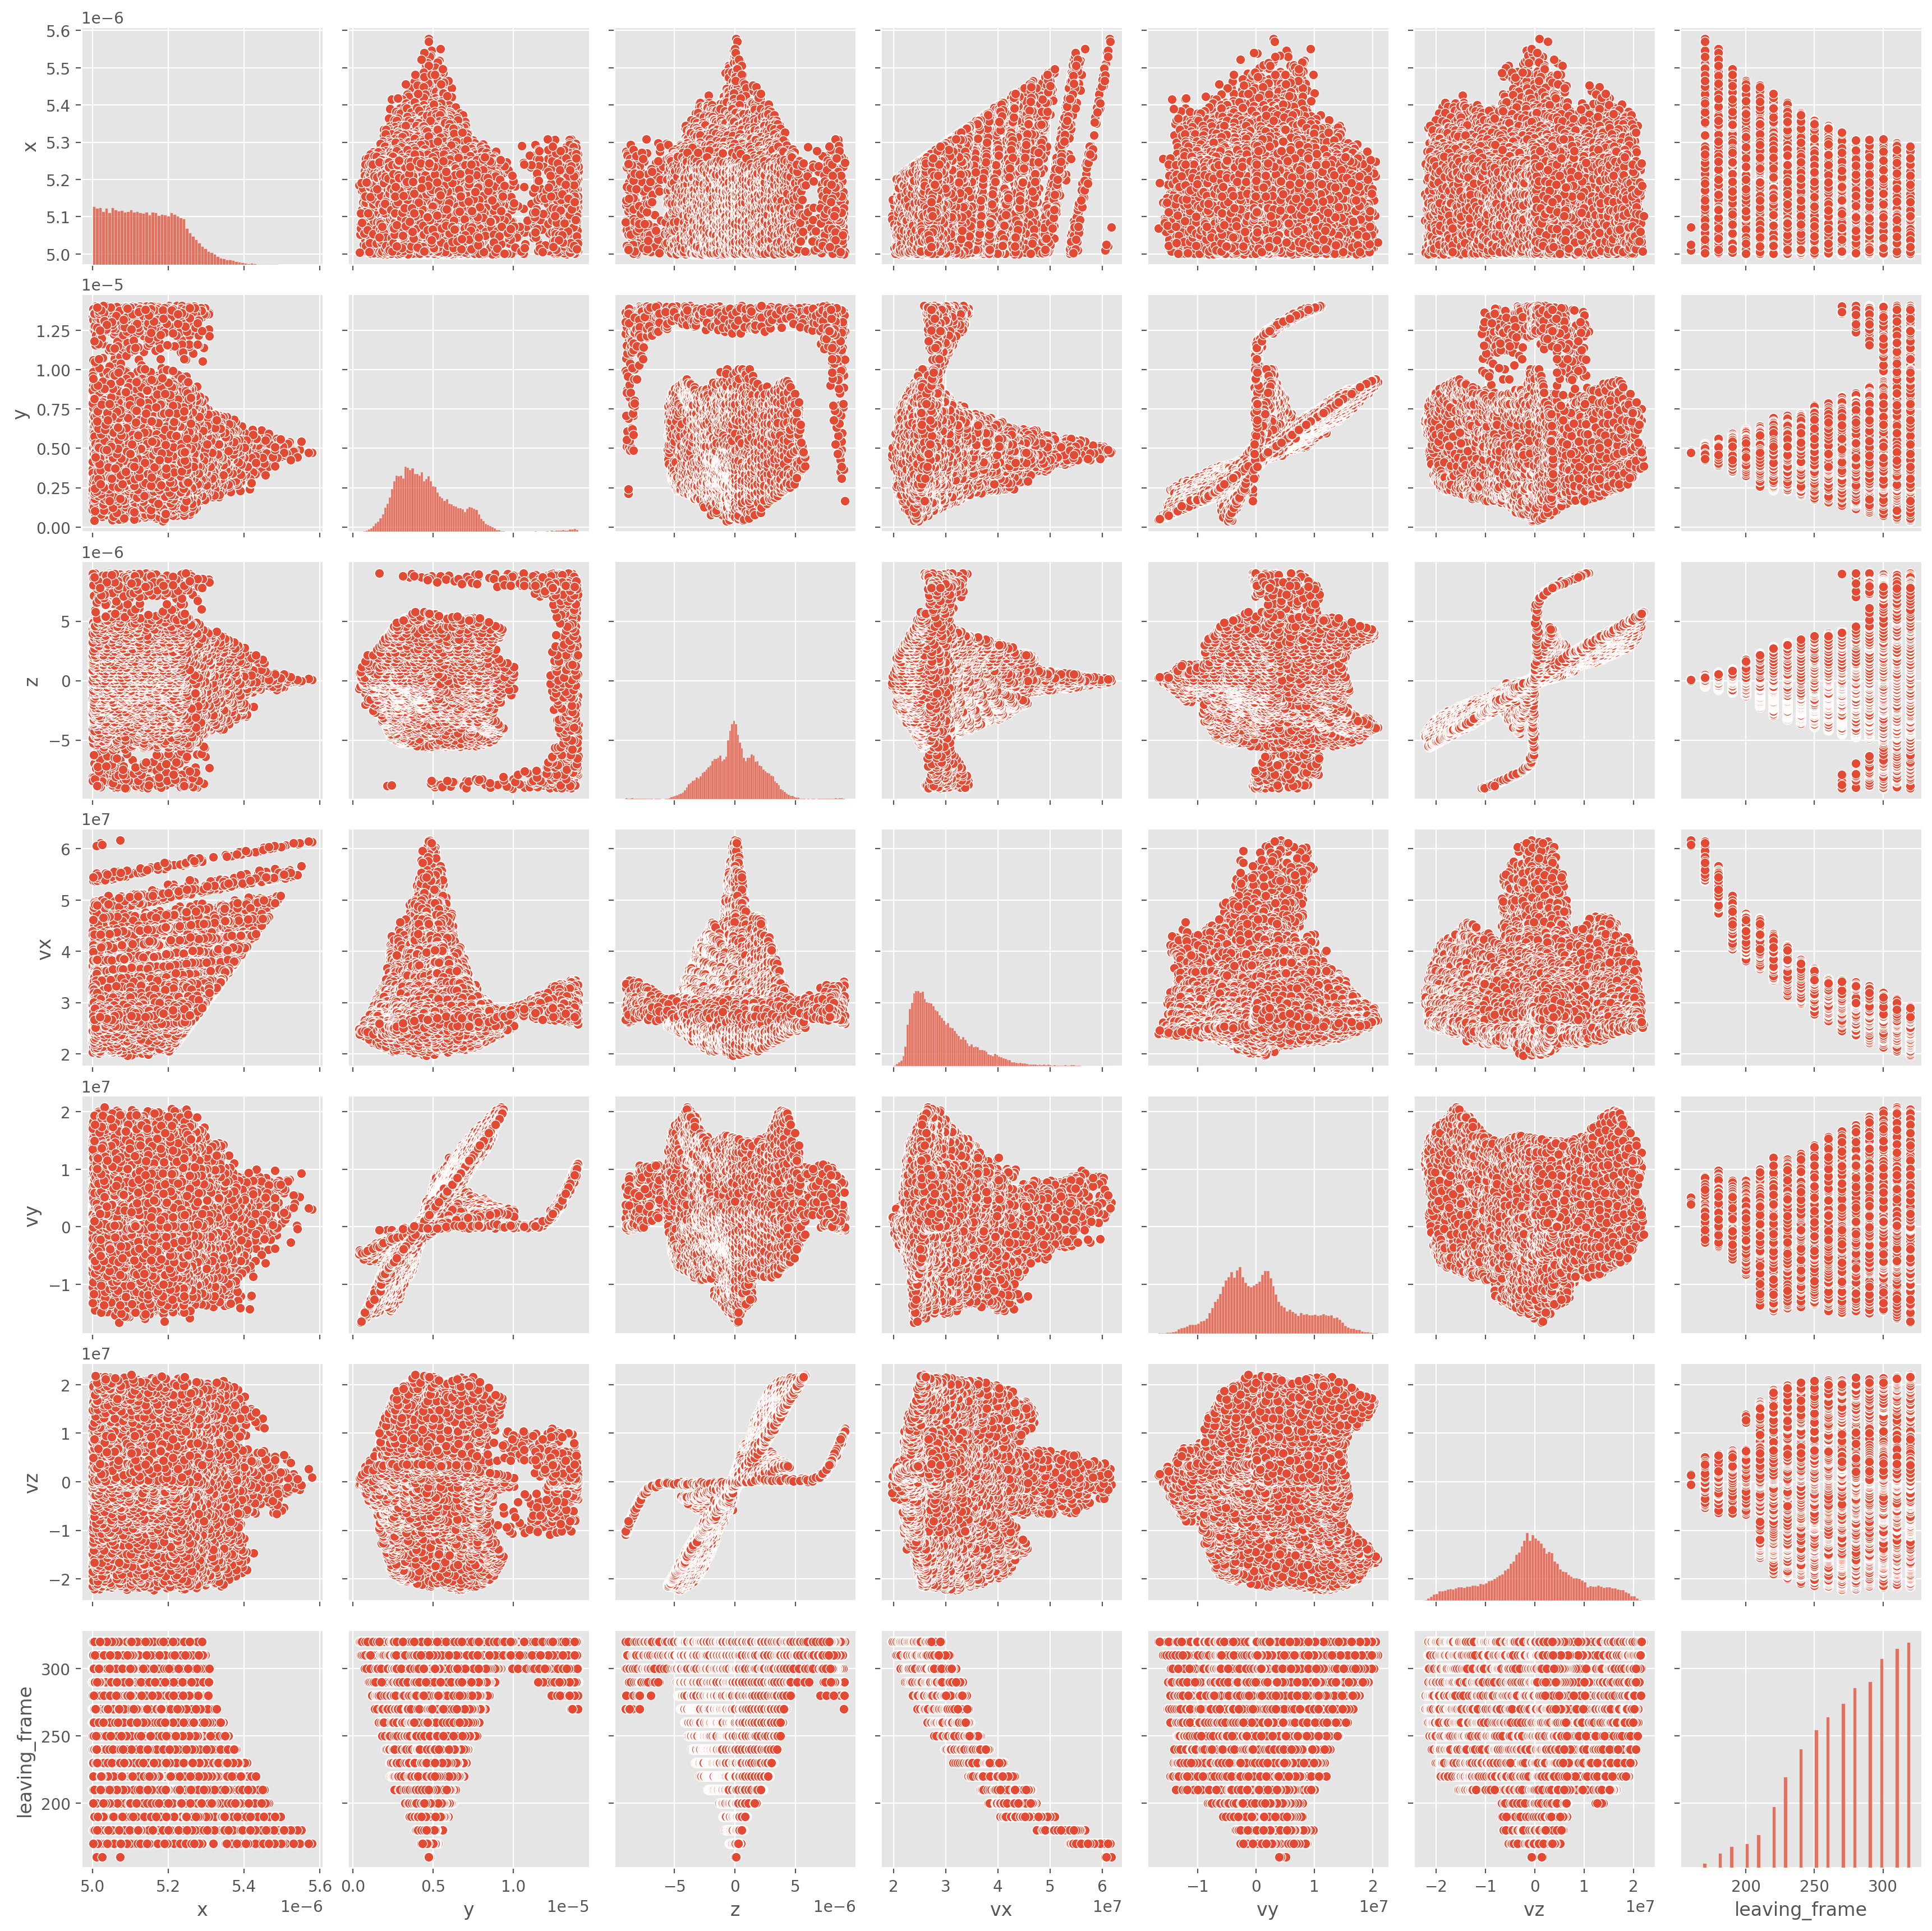

In [45]:
sns.pairplot(data_subset)